# **CodeClause Project 2**
# **Name : Om Ghadia**
# **Project Name : Brain Tumor Detection Using Data Science**


# Import the required modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.patches as patches
import matplotlib as mpl
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


# Prepare/Collect data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
path = os.listdir('/content/drive/MyDrive/braintumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}


In [ ]:
print(classes)

{'no_tumor': 0, 'pituitary_tumor': 1}


In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/braintumor/Training/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
X=np.array(X)
Y=np.array(Y)
X_updated=X.reshape(len(X),-1)

# X stores the images

In [ ]:
print(X)

[[[ 0  1  2 ...  0  0  0]
  [ 1  1  1 ...  0  0  0]
  [ 2  1  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 8  9  7 ...  8  8  9]
  [10 10  8 ...  8  9  9]
  [ 8  8  8 ...  7  7  7]
  ...
  [ 6  6  6 ...  9  8  8]
  [ 7  6  5 ... 11  7  9]
  [ 8  8  8 ... 11  8 10]]

 [[12 13 13 ... 13 13 13]
  [12 13 13 ... 13 13 13]
  [12 13 13 ... 13 13 13]
  ...
  [13 13 13 ... 13 13 13]
  [13 13 13 ... 13 13 13]
  [13 13 13 ... 13 13 13]]

 ...

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 1  1  1 ...  2  2  2]
  ...
  [12 22 16 ...  9  5  2]
  [ 1  2  2 ...  5  3  1]
  [ 1  0  1 ...  1  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]]


# Y stores the class labels

In [ ]:
print(Y)

[0 0 0 ... 1 1 1]


In [ ]:
np.unique(X)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
np.unique(Y)

array([0, 1])

# Total number of No Tumor and Pituitory Tumor Entries

In [ ]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [ ]:
X.shape,X_updated.shape

((1222, 200, 200), (1222, 40000))

# Visualize Data

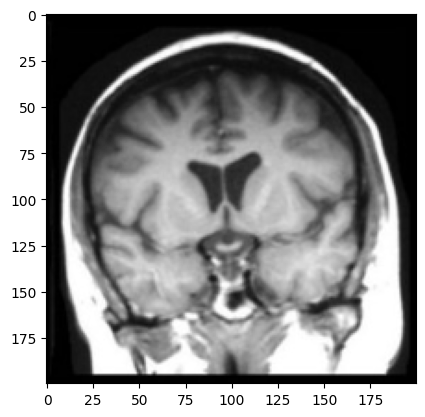

In [ ]:
plt.imshow(X[0],cmap='gray')

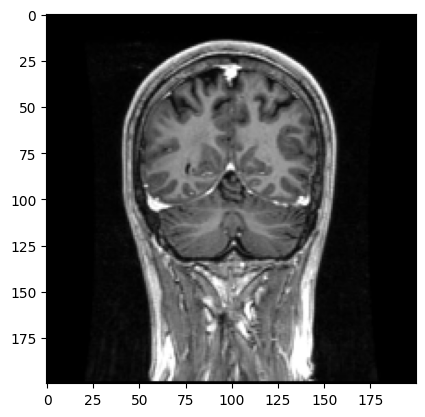

In [ ]:
plt.imshow(X[100],cmap='gray')

# Prepare Data

In [ ]:
X_updated=X.reshape(len(X),-1)
X_updated.shape

(1222, 40000)

# Splitting Data Into Train and Test

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X_updated,Y,random_state=1,test_size=0.20)

In [ ]:
xtrain.shape,xtest.shape

((977, 40000), (245, 40000))

In [ ]:
ytrain.shape,ytest.shape

((977,), (245,))

# Feature Scaling

In [ ]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Feature Selection : PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(xtrain.shape,xtest.shape)
pca=PCA(0.98)
pca_train=xtrain
pca_test=xtest

(977, 40000) (245, 40000)


# Training the Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Training Logistic Model

In [ ]:
import warnings
warnings.filterwarnings('ignore')
lg=LogisticRegression(C=0.1)
lg.fit(xtrain,ytrain)

LogisticRegression(C=0.1)

# Training SVC Model

In [ ]:
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

# Training Decision Tree Classifier

In [ ]:
classifier=DecisionTreeClassifier(random_state=0)
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=0)

# Training Random Forest Classifier

In [ ]:
classifier_r=RandomForestClassifier(n_estimators=10,random_state=0)
classifier_r.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10, random_state=0)

## **EVALUATION**

# Using Logistic Model

In [ ]:
Training_lg=lg.score(xtrain,ytrain)
Testing_lg=lg.score(xtest,ytest)

In [ ]:
print("Training Score:",Training_lg)
print("Testing Score:",Testing_lg)

Training Score: 1.0
Testing Score: 0.9714285714285714


# Using SVC Model

In [ ]:
Training_sv=sv.score(xtrain,ytrain)
Testing_sv=sv.score(xtest,ytest)

In [ ]:
print("Training Score:",Training_sv)
print("Testing Score:",Testing_sv)

Training Score: 0.9918116683725691
Testing Score: 0.9755102040816327


# Using Decision Tree Classifier

In [ ]:
Training_dt=classifier.score(xtrain,ytrain)
Testing_dt=classifier.score(xtest,ytest)

In [ ]:
print('Training Score:',Training_dt)
print('Testing Score:',Testing_dt)

Training Score: 1.0
Testing Score: 0.9836734693877551


# Using Random Forest Classifier

In [ ]:
Training_rf=classifier_r.score(xtrain,ytrain)
Testing_rf=classifier_r.score(xtest,ytest)

In [ ]:
print('Training Score:',Training_rf)
print('Testing Score:',Testing_rf)

Training Score: 0.9989764585465711
Testing Score: 0.9918367346938776


# **VISUALIZATION**


In [ ]:
dataset={'Model':['Logistic','SVC','Decision Tree','Random Forest'],'Training Score':[Training_lg,Training_sv,Training_dt,Training_rf],'Testing Score':[Testing_lg,Testing_sv,Testing_dt,Testing_rf]}
df=pd.DataFrame(dataset)
print(df)

           Model  Training Score  Testing Score
0       Logistic        1.000000       0.971429
1            SVC        0.991812       0.975510
2  Decision Tree        1.000000       0.983673
3  Random Forest        0.998976       0.991837


In [ ]:
figure=go.Figure(data=[go.Bar(x=dataset['Model'],y=dataset['Training Score'],marker={'color':'#3182bd'})])
figure.update_layout(title='Training Scores of Various Models')
figure.update_traces(marker=dict(line=dict(color='black', width=1.5)),width=0.5)
figure.show()

In [ ]:
figure=go.Figure(data=[go.Bar(x=dataset['Model'],y=dataset['Testing Score'],marker={'color':'#3182bd'})])
figure.update_layout(title='Testing Scores of Various Models')
figure.update_traces(marker=dict(line=dict(color='black', width=1.5)),width=0.5)
figure.show()

# Prediction Using Logistic Model

In [ ]:
lpred=lg.predict(xtest)

In [ ]:
print(np.concatenate((lpred.reshape(len(lpred),1),ytest.reshape(len(ytest),1)),1) )

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [ ]:
misclassified=np.where(ytest!=lpred)

In [ ]:
print('Misclassfied Samples:',len(misclassified[0]))

Misclassfied Samples: 7


In [ ]:
print(misclassified)

(array([  7,  85,  98, 168, 173, 223, 227]),)


In [ ]:
print("Predicted And Testing Data Output:",lpred[227],ytest[227])

Predicted And Testing Data Output: 1 0


# Testing Using Logistic Model

In [ ]:
dec={0:'No Tumor',1:'Positive Tumor'}

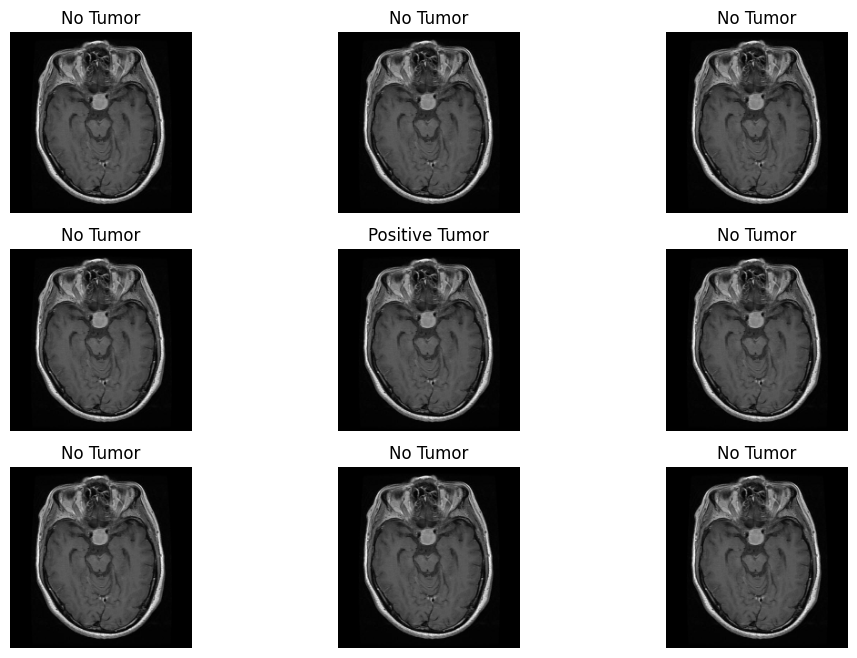

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/braintumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/braintumor/Testing/no_tumor/')[:9]:
  plt.subplot(3,3,c)
  image=cv2.imread('/content/drive/MyDrive/braintumor/Testing/no_tumor/'+i,0)
  image1=cv2.resize(image,(200,200))
  image1=image1.reshape(1,-1)/255
  p=lg.predict(image1)
  plt.title(dec[p[0]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

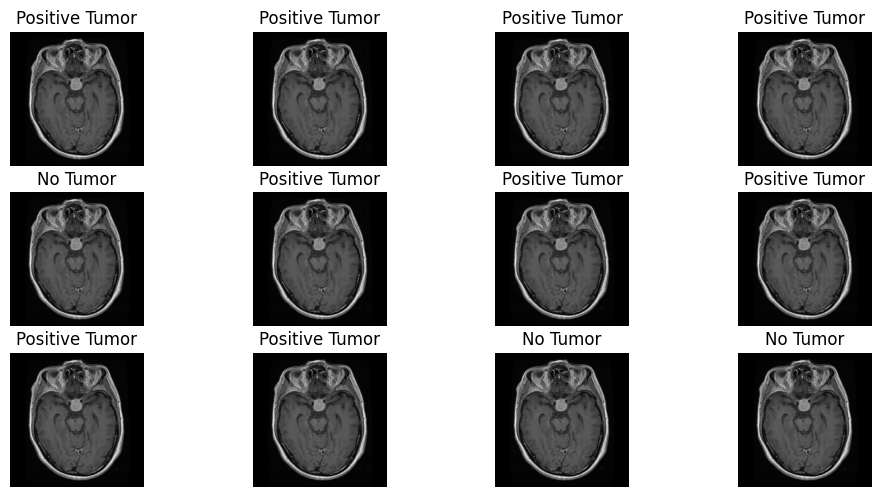

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/braintumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/braintumor/Testing/pituitary_tumor/')[:12]:
  plt.subplot(4,4,c)
  image=cv2.imread('/content/drive/MyDrive/braintumor/Testing/pituitary_tumor/'+i,0)
  image1=cv2.resize(image,(200,200))
  image1=image1.reshape(1,-1)/255
  p=lg.predict(image1)
  plt.title(dec[p[0]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

# Confusion Matrix And Accuracy,Precision and Recall Scores of the logistic model

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
cm=confusion_matrix(lpred,ytest)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[ 76   1]
 [  6 162]]


In [ ]:
print("Accuracy Score of Logisitic Model : ",accuracy_score(lpred,ytest))

Accuracy Score of Logisitic Model :  0.9714285714285714


In [ ]:
print("Precision Score of Logisitic Model : ",accuracy_score(lpred,ytest))

Precision Score of Logisitic Model :  0.9714285714285714


In [ ]:
print("Recall Score of Logisitic Model : ",accuracy_score(lpred,ytest))

Recall Score of Logisitic Model :  0.9714285714285714


# Prediction Using SVC Model

In [ ]:
pred=sv.predict(xtest)

In [ ]:
print(np.concatenate((pred.reshape(len(pred),1),ytest.reshape(len(ytest),1)),1) )

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [ ]:
misclassified=np.where(ytest!=pred)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))

Total Misclassified Samples:  6


In [ ]:
print(misclassified)

(array([ 61,  85,  98, 123, 168, 223]),)


In [ ]:
print("Predicted and Test Data Output:",pred[61],ytest[61])

Predicted and Test Data Output: 1 0


# Testing Using SVC Model

# No Tumor Prediction

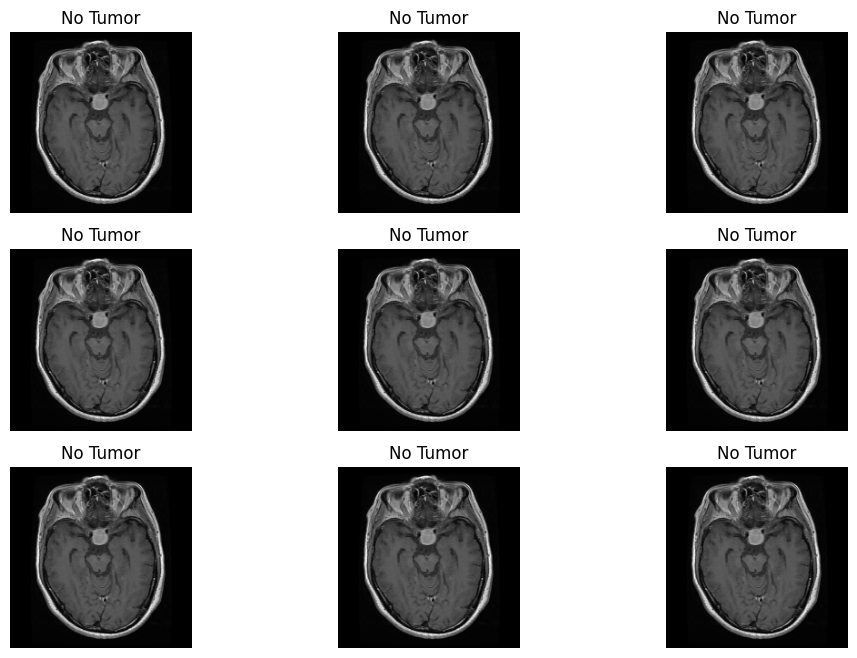

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/braintumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/braintumor/Testing/no_tumor/')[:9]:
  plt.subplot(3,3,c)
  image=cv2.imread('/content/drive/MyDrive/braintumor/Testing/no_tumor/'+i,0)
  image1=cv2.resize(image,(200,200))
  image1=image1.reshape(1,-1)/255
  p=sv.predict(image1)
  plt.title(dec[p[0]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

# Pituitary Tumor Prediction

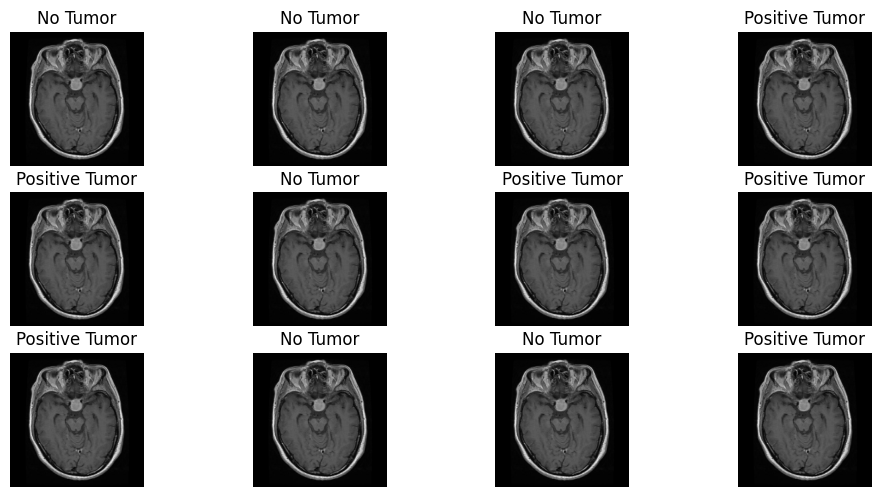

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/braintumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/braintumor/Testing/pituitary_tumor/')[:12]:
  plt.subplot(4,4,c)
  image=cv2.imread('/content/drive/MyDrive/braintumor/Testing/pituitary_tumor/'+i,0)
  image1=cv2.resize(image,(200,200))
  image1=image1.reshape(1,-1)/255
  p=sv.predict(image1)
  plt.title(dec[p[0]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

# Confusion Matrix and Accuracy,Precision and Recall Scores of SVC Model

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
cm=confusion_matrix(pred,ytest)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[ 77   1]
 [  5 162]]


In [ ]:
print("Accuracy Score of SVC Model : ",accuracy_score(pred,ytest))

Accuracy Score of SVC Model :  0.9755102040816327


In [ ]:
print("Precision Score of Random Forest Classifier : ",accuracy_score(pred,ytest))

Precision Score of Random Forest Classifier :  0.9755102040816327


In [ ]:
print("Recall Score of Random Forest Classifier : ",accuracy_score(pred,ytest))

Recall Score of Random Forest Classifier :  0.9755102040816327


# Prediction Using Decision Tree Classifier


In [ ]:
dpred=classifier.predict(xtest)


In [ ]:
print(np.concatenate((lpred.reshape(len(dpred),1),ytest.reshape(len(ytest),1)),1) )

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [ ]:
misclassified=np.where(dpred!=ytest)
print('Misclassified Samples:',len(misclassified[0]))

Misclassified Samples: 4


In [ ]:
print(misclassified)

(array([ 76,  98, 133, 227]),)


In [ ]:
print("Predicted and Test Data Output:",dpred[76],ytest[76])

Predicted and Test Data Output: 0 1


# Testing Using Decision Tree Classifier

# No Tumor Prediction

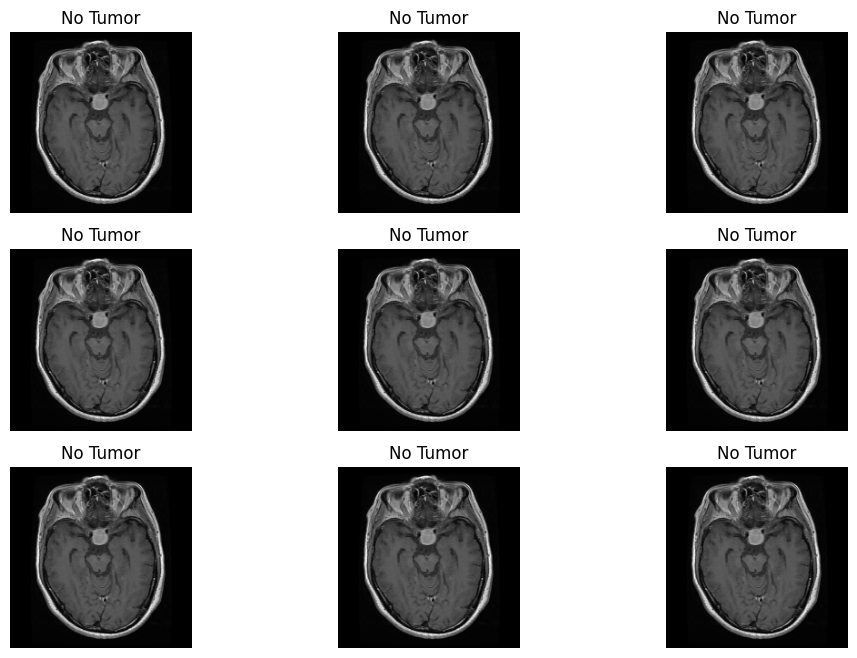

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/braintumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/braintumor/Testing/no_tumor/')[:9]:
  plt.subplot(3,3,c)
  image=cv2.imread('/content/drive/MyDrive/braintumor/Testing/no_tumor/'+i,0)
  image1=cv2.resize(image,(200,200))
  image1=image1.reshape(1,-1)/255
  p=classifier.predict(image1)
  plt.title(dec[p[0]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

# Pituitary Tumor Prediction

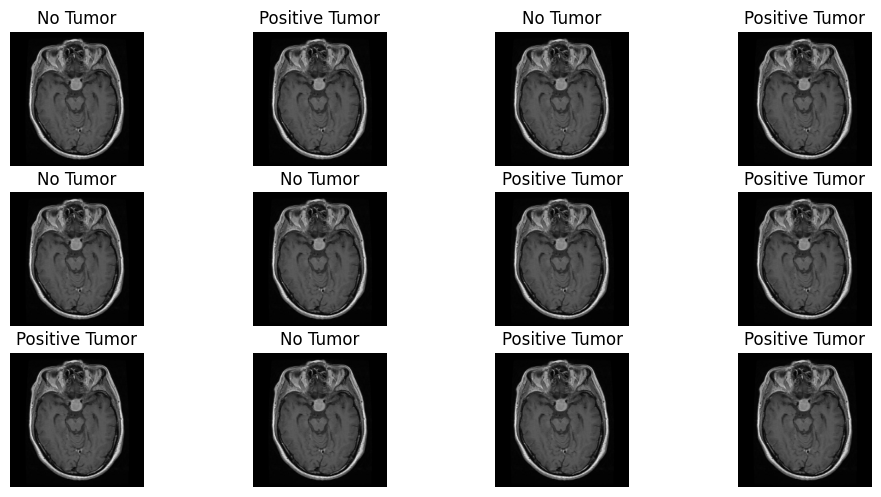

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/braintumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/braintumor/Testing/pituitary_tumor/')[:12]:
  plt.subplot(4,4,c)
  image=cv2.imread('/content/drive/MyDrive/braintumor/Testing/pituitary_tumor/'+i,0)
  image1=cv2.resize(image,(200,200))
  image1=image1.reshape(1,-1)/255
  p=classifier.predict(image1)
  plt.title(dec[p[0]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

# Confusion Matrix and Accuracy,Precision and Recall Scores of Decision Tree Classifier

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
cm=confusion_matrix(dpred,ytest)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[ 79   1]
 [  3 162]]


In [ ]:
print("Accuracy Score of Decision Tree Classifier : ",accuracy_score(dpred,ytest))

Accuracy Score of Decision Tree Classifier :  0.9836734693877551


In [ ]:
print("Precision Score of Random Forest Classifier : ",accuracy_score(dpred,ytest))

Precision Score of Random Forest Classifier :  0.9836734693877551


In [ ]:
print("Recall Score of Random Forest Classifier : ",accuracy_score(dpred,ytest))

Recall Score of Random Forest Classifier :  0.9836734693877551


# Prediction Using Random Forest Classifier

In [ ]:
rpred=classifier_r.predict(xtest)

In [ ]:
print(np.concatenate((lpred.reshape(len(rpred),1),ytest.reshape(len(ytest),1)),1) )

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [ ]:
misclassified=np.where(rpred!=ytest)


In [ ]:
print('Misclassified Samples:',len(misclassified[0]))

Misclassified Samples: 2


In [ ]:
print(misclassified)

(array([ 98, 133]),)


In [ ]:
print("Predicted and Test Data Output:",rpred[98],ytest[98])

Predicted and Test Data Output: 1 0


# Testing Using Random Forest Classifier

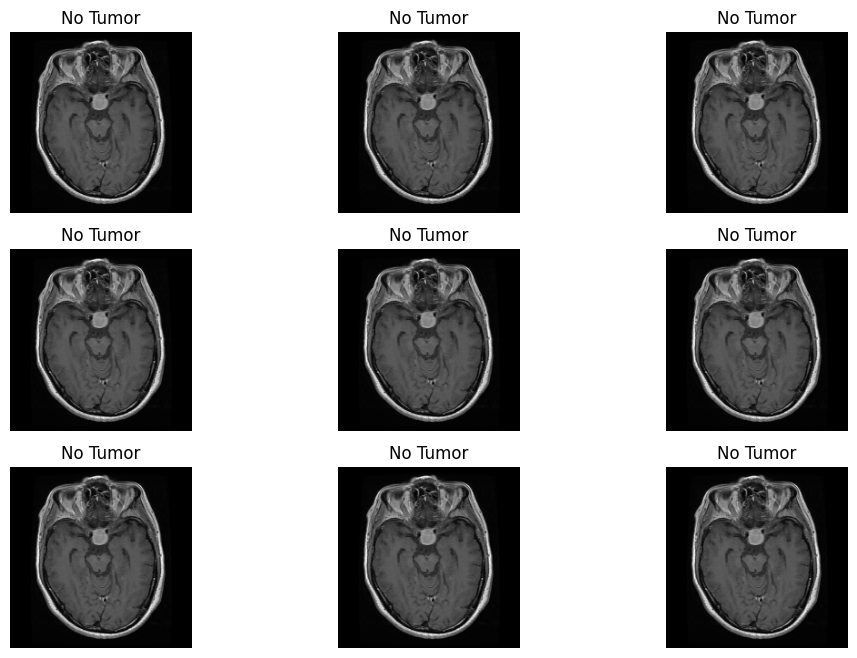

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/braintumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/braintumor/Testing/no_tumor/')[:9]:
  plt.subplot(3,3,c)
  image=cv2.imread('/content/drive/MyDrive/braintumor/Testing/no_tumor/'+i,0)
  image1=cv2.resize(image,(200,200))
  image1=image1.reshape(1,-1)/255
  p=classifier_r.predict(image1)
  plt.title(dec[p[0]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

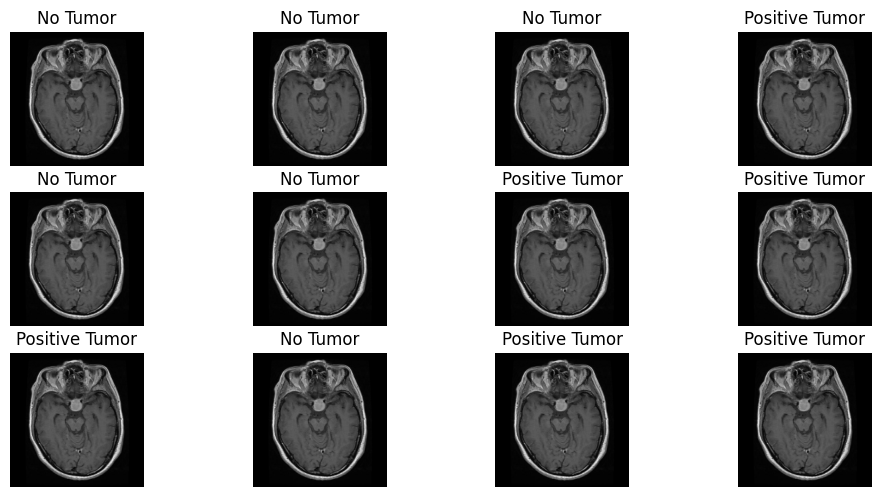

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/braintumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/braintumor/Testing/pituitary_tumor/')[:12]:
  plt.subplot(4,4,c)
  image=cv2.imread('/content/drive/MyDrive/braintumor/Testing/pituitary_tumor/'+i,0)
  image1=cv2.resize(image,(200,200))
  image1=image1.reshape(1,-1)/255
  p=classifier_r.predict(image1)
  plt.title(dec[p[0]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

# Confusion Matrix and Accuracy,Precision and Recall Scores of Random Forest Classifier

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
cm=confusion_matrix(rpred,ytest)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[ 80   0]
 [  2 163]]


In [ ]:
print("Accuracy Score of Random Forest Classifier : ",accuracy_score(rpred,ytest))

Accuracy Score of Random Forest Classifier :  0.9918367346938776


In [ ]:
print("Precision Score of Random Forest Classifier : ",precision_score(rpred,ytest))

Precision Score of Random Forest Classifier :  1.0


In [ ]:
print("Recall Score of Random Forest Classifier : ",recall_score(rpred,ytest))

Recall Score of Random Forest Classifier :  0.9878787878787879
